<a href="https://colab.research.google.com/github/audreyvargas314/GSE-Stanford-Projects/blob/main/8_5_SIR_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is similar to a recent study, [A SIR model assumption for the spread of COVID-19 in different communities](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7321055/)

Solving the system of differential equations: 

$\frac{dR(t)}{dt} = \gamma I(t)$ 

$\frac{dS(t)}{dt} = \frac{-\beta I(t)S(t)}{N}$

$\frac{dI(t)}{dt} = \frac{\beta I(t)S(t)}{N} - \gamma I(t)$

$\beta$ is the number of people an infected person infects per day

$D$ is the number of days an infected person can spread the disease

$R_o = \beta * D$  is the total number of people an infected person infects 

$\gamma = \frac{1}{D}$ is the percentage of infected people that recover per day


A Python library called SciPy has a function called [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) which can be used to solve the system of differential equations for $S(t)$, $I(t)$, and $R(t)$.


First, the constraints must be defined - $N$, $\beta$, and $D$. This project uses hypothetical values; the population size is 1000, an infected person infects an average of 0.5 people a day, and the infectious period lasts one week. Then, $R_o$ and $\gamma$ are defined.

In [ ]:
# define constants
N = 1000
beta = 0.5
D = 7
gamma = 1 / D
Ro = beta * D


At this point, the time range over which we want to calculate our $S$, $I$, and $R$ populations must be defined. Using a hypothetical time frame that lasts 100 days, a list called $t$ that contains every integer from 0 to 100 is created. When the system is solved, the $S$, $I$, and $R$ values will be calculated for days 0 - 100.

In [ ]:
# time range in days
t = []
for i in range(101):
    t.append(i)
print(t)





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


The 'inital conditions' must be defined. These are the starting values for $S$, $I$, and $R$, or the number of 'Susceptible', 'Infectious', and 'Removed' people at day 0. A list with three items is made - the first being the starting value for $S$, the next item being the starting value for $I$, and the last item being the starting value for $R$. All of the values have to add up to N, since there is a total of N people in the population.

In [ ]:
# initial conditions
init_conditions = [N-1, 1, 0]


The next code cells writes a function that defines the system of equations, and then calls odeint to solve the system of equations - producing the values for $S$, $I$ and $R$ over the time period $t$ defined earlier, based off the initial conditions and constants also defined earlier. 

In [ ]:
#run me
#define system of equations
def SIR_eqns(f, t, N, beta, D, gamma, Ro):
    S, I, R = f
    #system of equations
    dSdt = (-beta * I * S) / N
    dIdt = (beta * I * S / N) - (gamma * I)
    dRdt = gamma * I
    equations = [dSdt, dIdt, dRdt]
    return equations


from scipy.integrate import odeint
#solve system of equations for S, I, and R over time period t
sol = odeint(SIR_eqns, init_conditions, t, args = (N, beta, D, gamma, Ro))
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]

$S$, $I$, and $R$ are all lists with the same length as $t$. 

The first value in $S$ is the size of the 'Susceptible' population at day 0 (the first value in $t$). The second value in $S$ is the size of the 'Susceptible' population at day 1 (the second value in $t$), and the 100th value in $S$ is the size of the 'Susceptible' population at day 99 (the 100th value in $t$). The same applies to $I$ and $R$.

In [ ]:
print(t)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
print(S)

[999.         998.40003398 997.54386708 996.32300981 994.58397744
 992.11060097 988.60038005 983.63390438 976.63737783 966.84081256
 953.23968761 934.57710121 909.37700388 876.07328868 833.28178337
 780.22865237 717.25701197 646.20332996 570.36928365 493.9475
 421.07769048 354.96313423 297.42004859 248.93052247 209.00899142
 176.63671698 150.60983818 129.75663506 113.04391776  99.61103533
  88.76496518  79.95862098  72.76473996  66.85118558  61.95991639
  57.8900129   54.48439439  51.61960248  49.19801416  47.14193233
  45.38910292  43.88930786  42.60176767  41.49315246  40.53605074
  39.70778424  38.98948479  38.36537113  37.82217858  37.34870647
  36.9354569   36.57434434  36.25846102  35.98188609  35.73952954
  35.52700374  35.34051742  35.17678732  35.03296456  34.90657276
  34.79545587  34.69773415  34.61176662  34.5361191   34.46953689
  34.41092134  34.35930969  34.31385764  34.2738243   34.23855917
  34.20749086  34.1801172   34.15599672  34.13474118  34.116009
  34.09949964  3

Now, the data will be plotted. A sub-library called  [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) that belongs to a library called [matplotlib](https://matplotlib.org/index.html) will be used.
The first line below imports this library and abreviates its name to "plt". To call a function from this library, the syntax *plt.functionName(arguments)* is used.
The *plot* function is what actually plots the data. The first argument should be a list that holds all of the x-values, and the second should be a list that holds all of the y-values. The first value in list 1 will correspond to the first value in list 2, and so on. The two lists need to be the same size, so there is a y-value for every x-value. Below, the 'Susceptible' values over time are plotted, and then plt.show is written to display the plot.



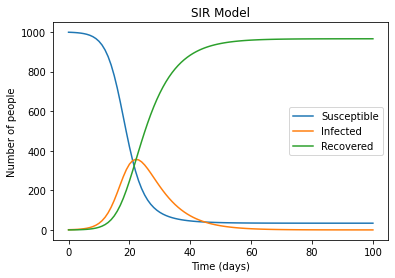

In [ ]:
#run me
import matplotlib.pyplot as plt
plt.plot(t, S)
plt.show
plt.plot(t, I)
plt.plot(t, R)
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('SIR Model')
plt.legend(['Susceptible', 'Infected', 'Recovered'])

Below, the 'Infected' and 'Removed' values are plotted. The graphs can be combined, as shown in the top, and can contain a legend to distinguish the respective graphs.

<function matplotlib.pyplot.show>

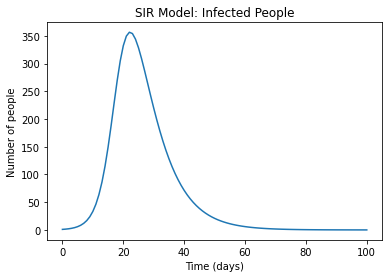

In [ ]:
plt.plot(t, I)
plt.ylabel('Number of people')
plt.title('SIR Model: Infected People')
plt.xlabel('Time (days)')
plt.show

<function matplotlib.pyplot.show>

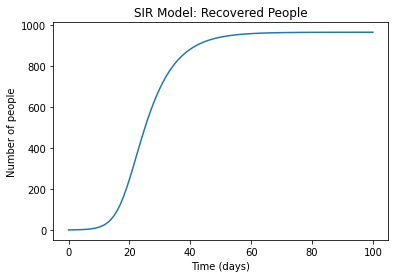

In [ ]:
plt.plot(t, R)
plt.ylabel('Number of people')
plt.title('SIR Model: Recovered People')
plt.xlabel('Time (days)')
plt.show